In [6]:
import geopandas as gpd

In [7]:
shp = 'countries.shp'

ulkeler = gpd.read_file(shp)

In [54]:
ulkeler.head()


,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [9]:
ulkeler.shape

(255, 12)

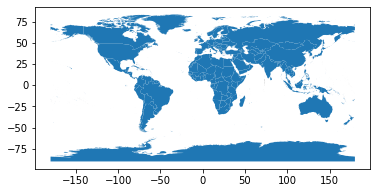

In [10]:
ulkeler.plot();

## 2. kısım: pandas ile csv dosyaöarının okunması ve Geodataframe'e dönüştürülmesi

In [1]:
import geopandas as gpd
import pandas as pd

In [4]:

df = pd.read_csv('acled2019.csv')
df.head()


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7002829,682,SAU22794,22794,28 March 2020,2020,1,Strategic developments,Disrupted weapons use,Military Forces of Saudi Arabia (2015-),...,Riyadh,24.6877,46.7219,2,26 September News Pro-Hadi,Regional,"On 28 March 2020, two pro-Houthi ballistic mis...",0,1585593786,SAU
1,7002830,682,SAU22796,22796,28 March 2020,2020,1,Strategic developments,Disrupted weapons use,Military Forces of Saudi Arabia (2015-),...,Jizan,16.8892,42.5511,2,26 September News Pro-Hadi,Regional,"On 28 March 2020, two pro-Houthi ballistic mis...",0,1585593786,SAU
2,7002584,682,SAU22795,22795,28 March 2020,2020,1,Explosions/Remote violence,Air/drone strike,Military Forces of Saudi Arabia (2015-),...,Wadi al Jarah,16.8165,43.2147,1,Al Motamar; Yemen Data Project,Local partner-Regional,"On 28 March 2020, 1 Saudi-led coalition airstr...",0,1585593785,SAU
3,7002582,682,SAU22792,22792,27 March 2020,2020,1,Strategic developments,Disrupted weapons use,Military Forces of Saudi Arabia (2015-),...,Abha,18.2164,42.5053,1,Al Arabiya; Yemen Data Project,Local partner-Regional,"On 27 March 2020, Saudi-led coalition forces r...",0,1585593785,SAU
4,7002583,682,SAU22793,22793,27 March 2020,2020,1,Strategic developments,Disrupted weapons use,Military Forces of Saudi Arabia (2015-),...,Khamis Mushait,18.3000,42.7333,1,Yemen Data Project; Al Arabiya,Local partner-Regional,"On 27 March 2020, Saudi-led coalition forces r...",0,1585593785,SAU


In [7]:
gdf=gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.longitude,df.latitude))
gdf.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
0,7002829,682,SAU22794,22794,28 March 2020,2020,1,Strategic developments,Disrupted weapons use,Military Forces of Saudi Arabia (2015-),...,24.6877,46.7219,2,26 September News Pro-Hadi,Regional,"On 28 March 2020, two pro-Houthi ballistic mis...",0,1585593786,SAU,POINT (46.72190 24.68770)
1,7002830,682,SAU22796,22796,28 March 2020,2020,1,Strategic developments,Disrupted weapons use,Military Forces of Saudi Arabia (2015-),...,16.8892,42.5511,2,26 September News Pro-Hadi,Regional,"On 28 March 2020, two pro-Houthi ballistic mis...",0,1585593786,SAU,POINT (42.55110 16.88920)
2,7002584,682,SAU22795,22795,28 March 2020,2020,1,Explosions/Remote violence,Air/drone strike,Military Forces of Saudi Arabia (2015-),...,16.8165,43.2147,1,Al Motamar; Yemen Data Project,Local partner-Regional,"On 28 March 2020, 1 Saudi-led coalition airstr...",0,1585593785,SAU,POINT (43.21470 16.81650)
3,7002582,682,SAU22792,22792,27 March 2020,2020,1,Strategic developments,Disrupted weapons use,Military Forces of Saudi Arabia (2015-),...,18.2164,42.5053,1,Al Arabiya; Yemen Data Project,Local partner-Regional,"On 27 March 2020, Saudi-led coalition forces r...",0,1585593785,SAU,POINT (42.50530 18.21640)
4,7002583,682,SAU22793,22793,27 March 2020,2020,1,Strategic developments,Disrupted weapons use,Military Forces of Saudi Arabia (2015-),...,18.3000,42.7333,1,Yemen Data Project; Al Arabiya,Local partner-Regional,"On 27 March 2020, Saudi-led coalition forces r...",0,1585593785,SAU,POINT (42.73330 18.30000)


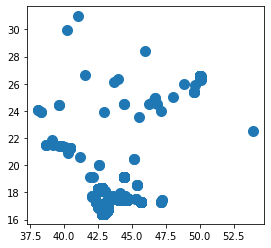

In [46]:
gdf.plot(markersize=100);

In [55]:
gdf.to_file("acled2019.shp", crs={'init' :'epsg:4326'})

C:\Users\HP\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
gdf.sample(1000).to_file("acled2019-geojson",driver="GeoJSON")

## 3. kısım: Coğrafi verilerin alt kümelerine ayrılması:

In [15]:
import geopandas as gpd
import pandas as pd

In [16]:
shp ="countries.shp"
ulkeler=gpd.read_file(shp)
ulkeler.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [17]:
ulkeler.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

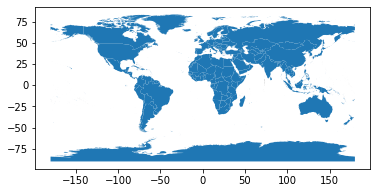

In [18]:
ulkeler.plot();

In [60]:
ulkeler[ulkeler['CONTINENT']== "Asia"]
asia= ulkeler[ulkeler['CONTINENT']== "Asia"]
asia.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
6,Dhekelia,7850,314.0,2013,-99,2013,2. Developed region: nonG7,2. High income: nonOECD,Asia,Asia,Western Asia,"POLYGON ((33.78094 34.97635, 33.76043 34.97968..."
7,Cyprus,1221549,29260.0,2017,2001,2016,6. Developing region,2. High income: nonOECD,Asia,Asia,Western Asia,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34..."
8,India,1281935911,8721000.0,2017,2011,2016,3. Emerging region: BRIC,4. Lower middle income,Asia,Asia,Southern Asia,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."


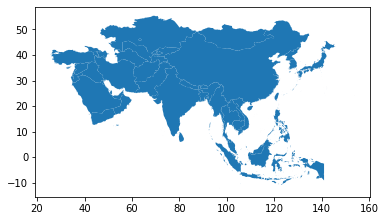

In [61]:
asia.plot();

In [62]:
asia_acled= gpd.read_file("acled2019.shp", mask= asia)


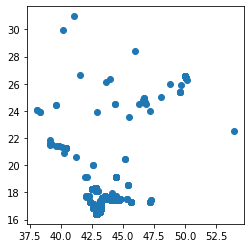

In [63]:
asia_acled.plot();

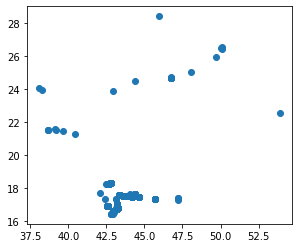

In [73]:
# ilk 500 olayı alıyor.
acled_subset= gpd.read_file("acled2019.shp", rows=500)
acled_subset.plot();

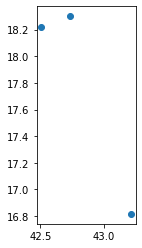

In [75]:
# 2 ila 5 (dahil değil) arası(rows) olay alımı 
acled_subset= gpd.read_file("acled2019.shp", rows = slice(2,5))
acled_subset.plot();